In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [5]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))

Shape x_train: (60000, 28, 28)
Shape x_test: (10000, 28, 28)


In [6]:
#reshape
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))

Shape x_train: (60000, 784)
Shape x_test: (10000, 784)


In [7]:
#scaling
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train[0:5, :]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
#Forming the output variables
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[0:5, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
#Modell 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,))) #hidden layer 1
model.add(tf.keras.layers.Dense(64,activation = 'relu')) #hidden layer 2                             #relu ist Aktivierungsfunktion
model.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
#Training
history = model.fit(x_train, y_train, epochs=20, batch_size=30,validation_split=0.10) #epochs Durchgänge, Batch-Size Grösse

Epoch 1/20
1800/1800 [==============================] - 5s 3ms/step - loss: 0.2246 - accuracy: 0.9336 - val_loss: 0.0979 - val_accuracy: 0.9717
Epoch 2/20
1800/1800 [==============================] - 4s 2ms/step - loss: 0.0924 - accuracy: 0.9720 - val_loss: 0.0705 - val_accuracy: 0.9792
Epoch 3/20
1800/1800 [==============================] - 4s 2ms/step - loss: 0.0627 - accuracy: 0.9803 - val_loss: 0.0771 - val_accuracy: 0.9775
Epoch 4/20
1800/1800 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0798 - val_accuracy: 0.9800
Epoch 5/20
1800/1800 [==============================] - 4s 2ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0857 - val_accuracy: 0.9753
Epoch 6/20
1800/1800 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0752 - val_accuracy: 0.9822
Epoch 7/20
1800/1800 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0843 - val_accuracy:

In [12]:
history.history['accuracy'][19] #welchen Batch, was soll gezeigt werden

0.9967036843299866


Accuracy during Training :
------------------------------------


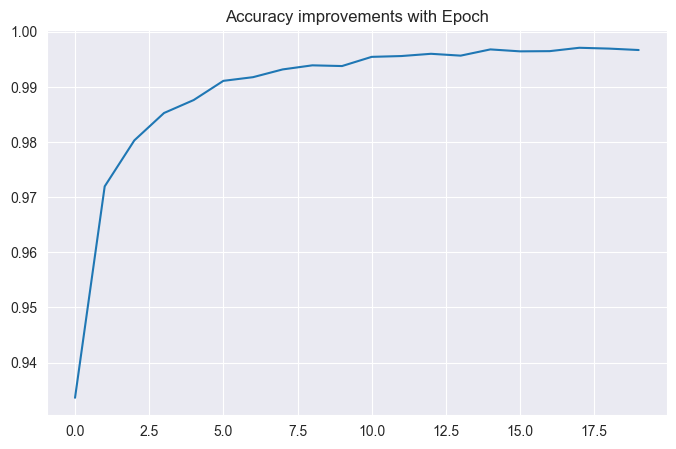


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 1s 1ms/step - loss: 0.1300 - accuracy: 0.9802


[0.13002057373523712, 0.9801999926567078]

In [13]:
#Evaluating
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)

In [14]:
#Modell 2
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(28*28,))) #hidden layer 1
model2.add(tf.keras.layers.Dense(64,activation = 'sigmoid')) #hidden layer 2                             #relu ist Aktivierungsfunktion
model2.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 85,614
Trainable params: 85,614
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Compile
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
#Training
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=32,validation_split=0.10) #epochs Durchgänge, Batch-Size Grösse

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5273 - accuracy: 0.8669 - val_loss: 0.1919 - val_accuracy: 0.9470
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1955 - accuracy: 0.9420 - val_loss: 0.1323 - val_accuracy: 0.9623
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1384 - accuracy: 0.9586 - val_loss: 0.1077 - val_accuracy: 0.9707
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1049 - accuracy: 0.9701 - val_loss: 0.0908 - val_accuracy: 0.9730
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0828 - accuracy: 0.9760 - val_loss: 0.0826 - val_accuracy: 0.9762
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0659 - accuracy: 0.9810 - val_loss: 0.0836 - val_accuracy: 0.9757
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0544 - accuracy: 0.9839 - val_loss: 0.0741 - val_accuracy:


Accuracy during Training :
------------------------------------


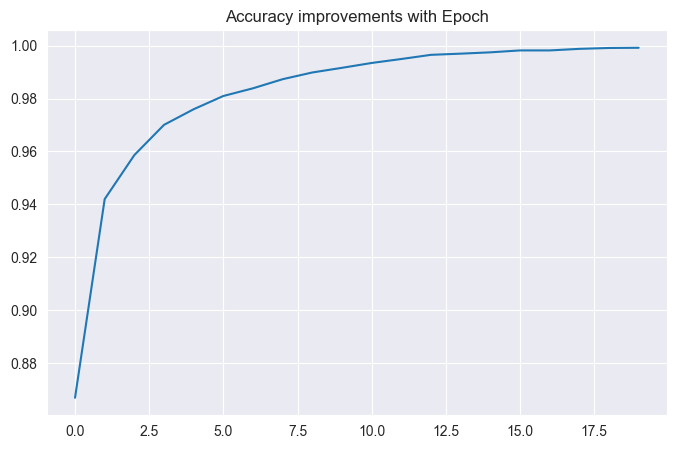


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9775


[0.09622131288051605, 0.9775000214576721]

In [17]:
#Evaluating
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history2.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model2.evaluate(x_test,y_test)

In [26]:
#Modell 3
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(28*28,))) #hidden layer 1
model3.add(tf.keras.layers.Dense(20,activation = 'relu')) #hidden layer 2                             #relu ist Aktivierungsfunktion
model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output layer
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 20)                2020      
                                                                 
 dense_17 (Dense)            (None, 5)                 105       
                                                                 
Total params: 80,625
Trainable params: 80,625
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Compile
model3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [20]:
#Training
history3 = model3.fit(x_train, y_train, epochs=20, batch_size=32,validation_split=0.10) #epochs Durchgänge, Batch-Size Grösse

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6674 - accuracy: 0.8245 - val_loss: 0.2722 - val_accuracy: 0.9245
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3002 - accuracy: 0.9149 - val_loss: 0.2179 - val_accuracy: 0.9393
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2454 - accuracy: 0.9305 - val_loss: 0.1916 - val_accuracy: 0.9470
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2102 - accuracy: 0.9407 - val_loss: 0.1654 - val_accuracy: 0.9540
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1831 - accuracy: 0.9480 - val_loss: 0.1442 - val_accuracy: 0.9625
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1616 - accuracy: 0.9543 - val_loss: 0.1346 - val_accuracy: 0.9630
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1447 - accuracy: 0.9592 - val_loss: 0.1242 - val_accuracy:


Accuracy during Training :
------------------------------------


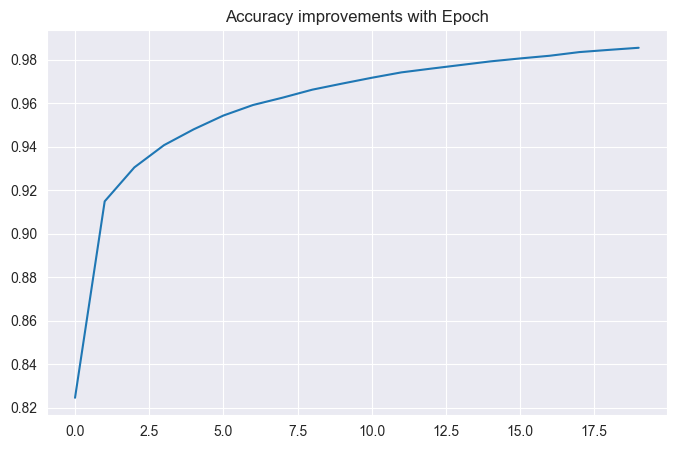


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9756


[0.08102857321500778, 0.975600004196167]

In [21]:
#Evaluating
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history3.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model3.evaluate(x_test,y_test)

In [22]:
#Training zum Test
history4 = model3.fit(x_train, y_train, epochs=20, batch_size=32,validation_split=0.50) #epochs Durchgänge, Batch-Size Grösse

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0472 - accuracy: 0.9874 - val_loss: 0.0568 - val_accuracy: 0.9847
Epoch 2/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0432 - accuracy: 0.9887 - val_loss: 0.0621 - val_accuracy: 0.9832
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0407 - accuracy: 0.9900 - val_loss: 0.0590 - val_accuracy: 0.9839
Epoch 4/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0382 - accuracy: 0.9908 - val_loss: 0.0597 - val_accuracy: 0.9832
Epoch 5/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0360 - accuracy: 0.9917 - val_loss: 0.0585 - val_accuracy: 0.9834
Epoch 6/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0338 - accuracy: 0.9924 - val_loss: 0.0594 - val_accuracy: 0.9829
Epoch 7/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0317 - accuracy: 0.9928 - val_loss: 0.0614 - val_accuracy: 0.9825
Epoch 


Accuracy during Training :
------------------------------------


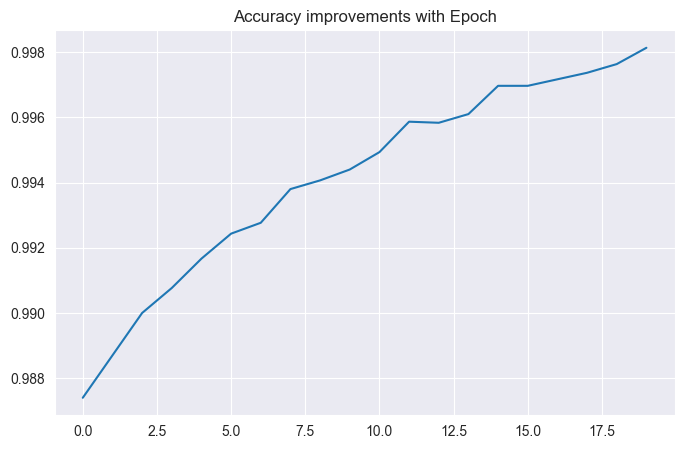


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9772


[0.0744381919503212, 0.9771999716758728]

In [23]:
#Evaluating
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history4.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model3.evaluate(x_test,y_test)